In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.offsetbox import AnchoredText
from helpers_plot import initPlot, finalizePlot
initPlot(titlesize=20)


In [44]:
# Load data
cov_type = "shapenoise" # Can be 'slics' or 'shapenoise'cov
sigma = 0.3
n = 4096*4096/10/10
thetaMax = 8.93

if (cov_type == 'slics'):
    folder = "/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/"
    cov_term2Numerical = np.loadtxt(folder+f'cov_slics_term2Numerical_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')
    cov_infiniteField = np.loadtxt(folder+f'cov_slics_infiniteField_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')
    cov_fft = np.loadtxt(folder+f'cov_slics_fft_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')*0.775 #Factor, is because 4*32 arcmin was cut off, not 4*16 arcmin
elif (cov_type == 'shapenoise'):
    folder = "/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/GaussianRandomFields/"
    cov_term1Analytical = np.loadtxt(folder+f'cov_shapenoise_infiniteField_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')
    cov_term2Analytical = np.loadtxt(folder+f'cov_shapenoise_term2Analytical_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')
    cov_term2Numerical = np.loadtxt(folder+f'cov_shapenoise_term2Numerical_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')
    cov_infiniteField = np.loadtxt(folder+f'cov_shapenoise_infiniteField_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')
    cov_fft = np.loadtxt(folder+f'cov_shapenoise_fft_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')*0.775 #Factor is because 4*32 arcmin was cut off, not 4*16 arcmin
else:
    print("Cov type not specified")

<Figure size 432x288 with 0 Axes>

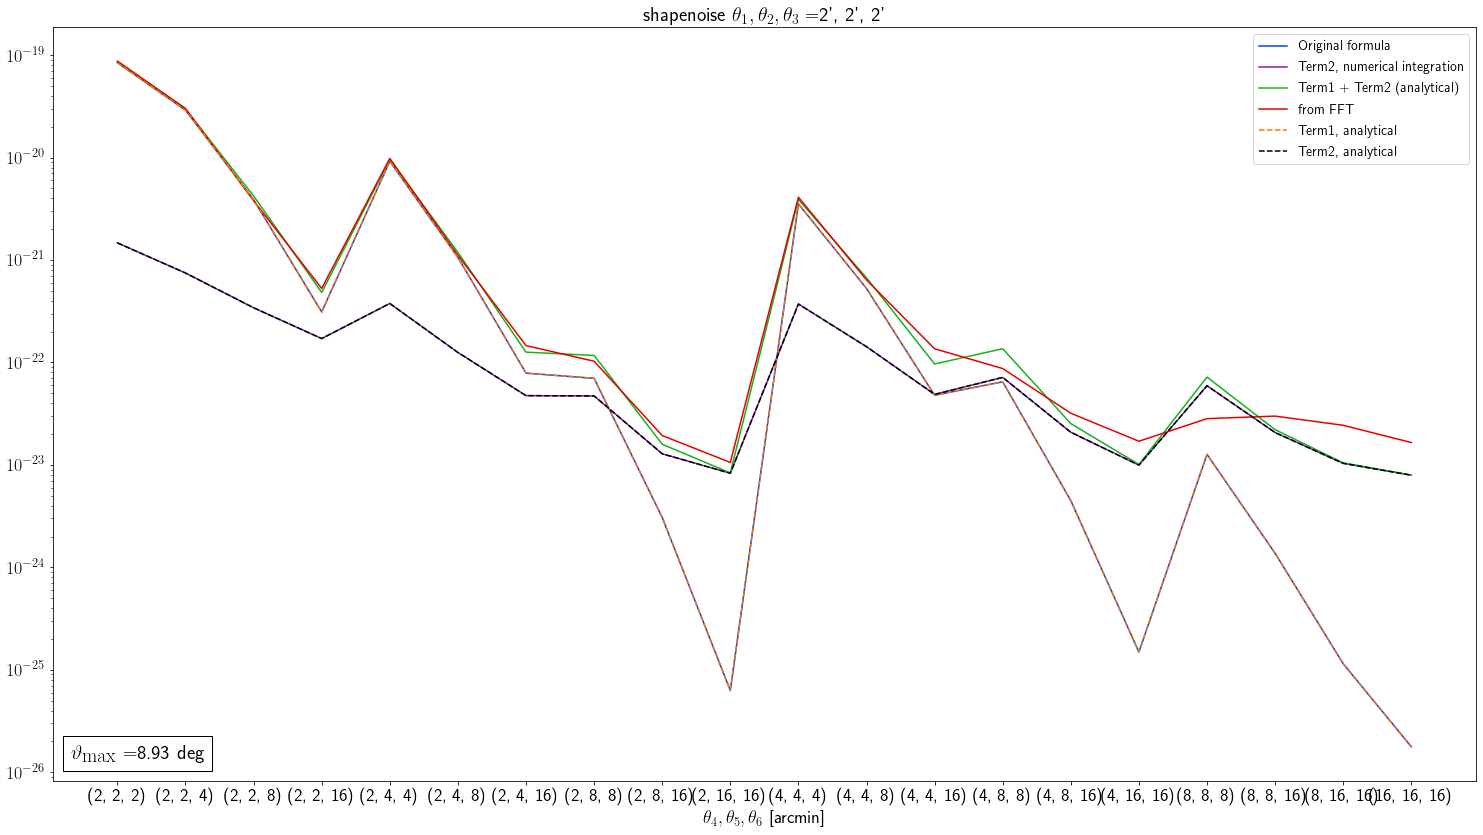

<Figure size 432x288 with 0 Axes>

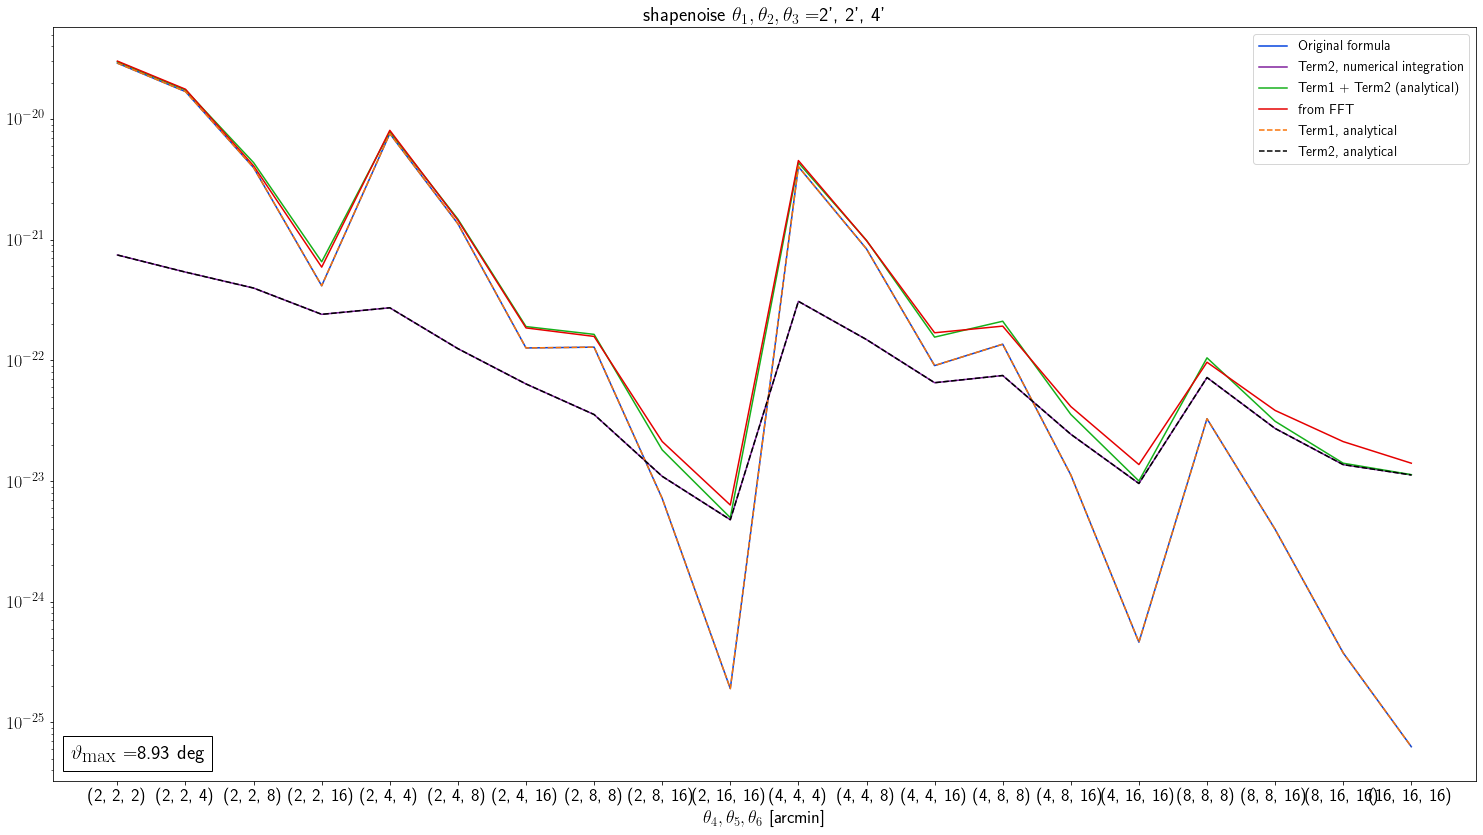

<Figure size 432x288 with 0 Axes>

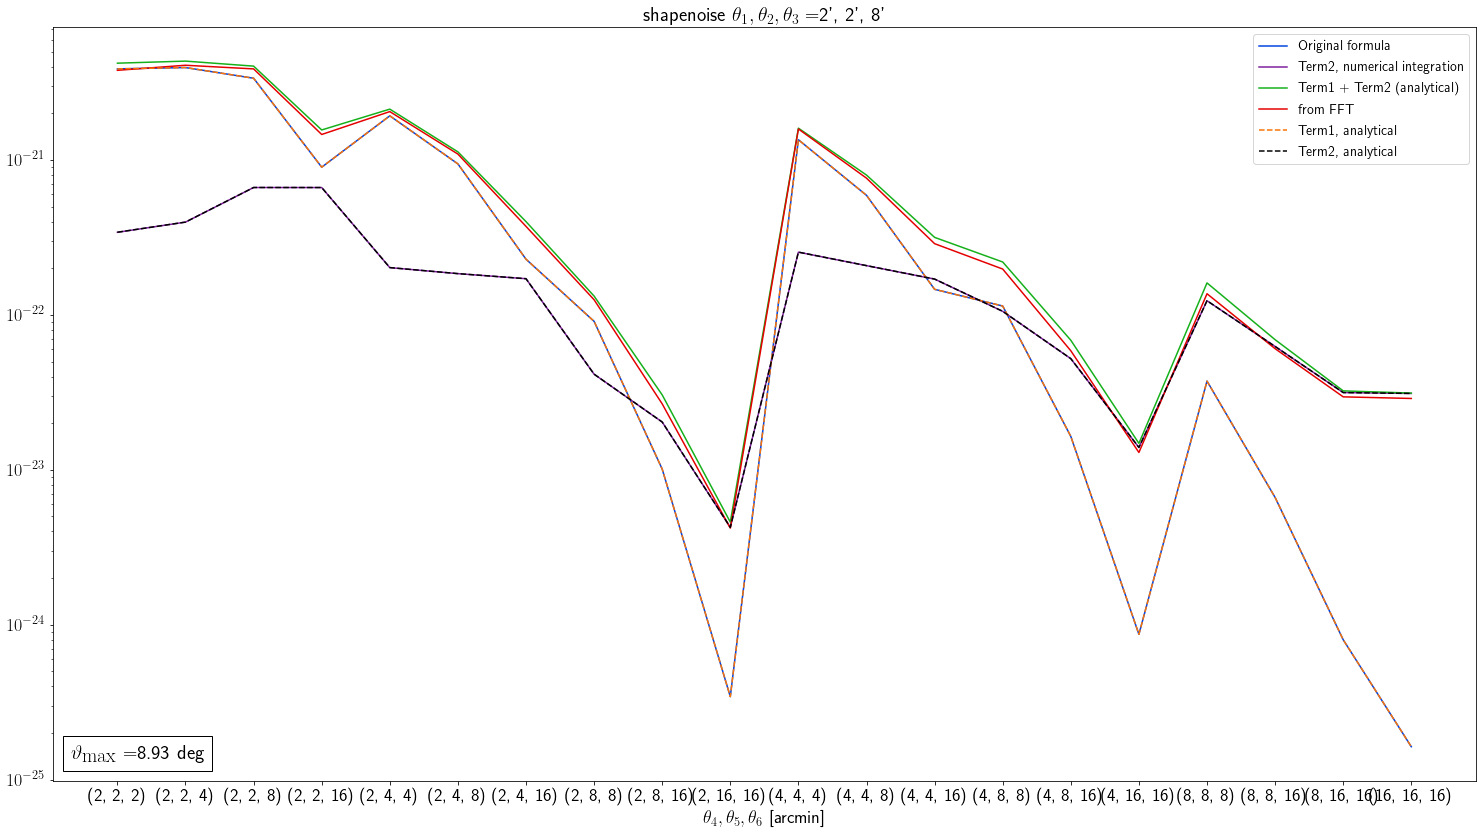

<Figure size 432x288 with 0 Axes>

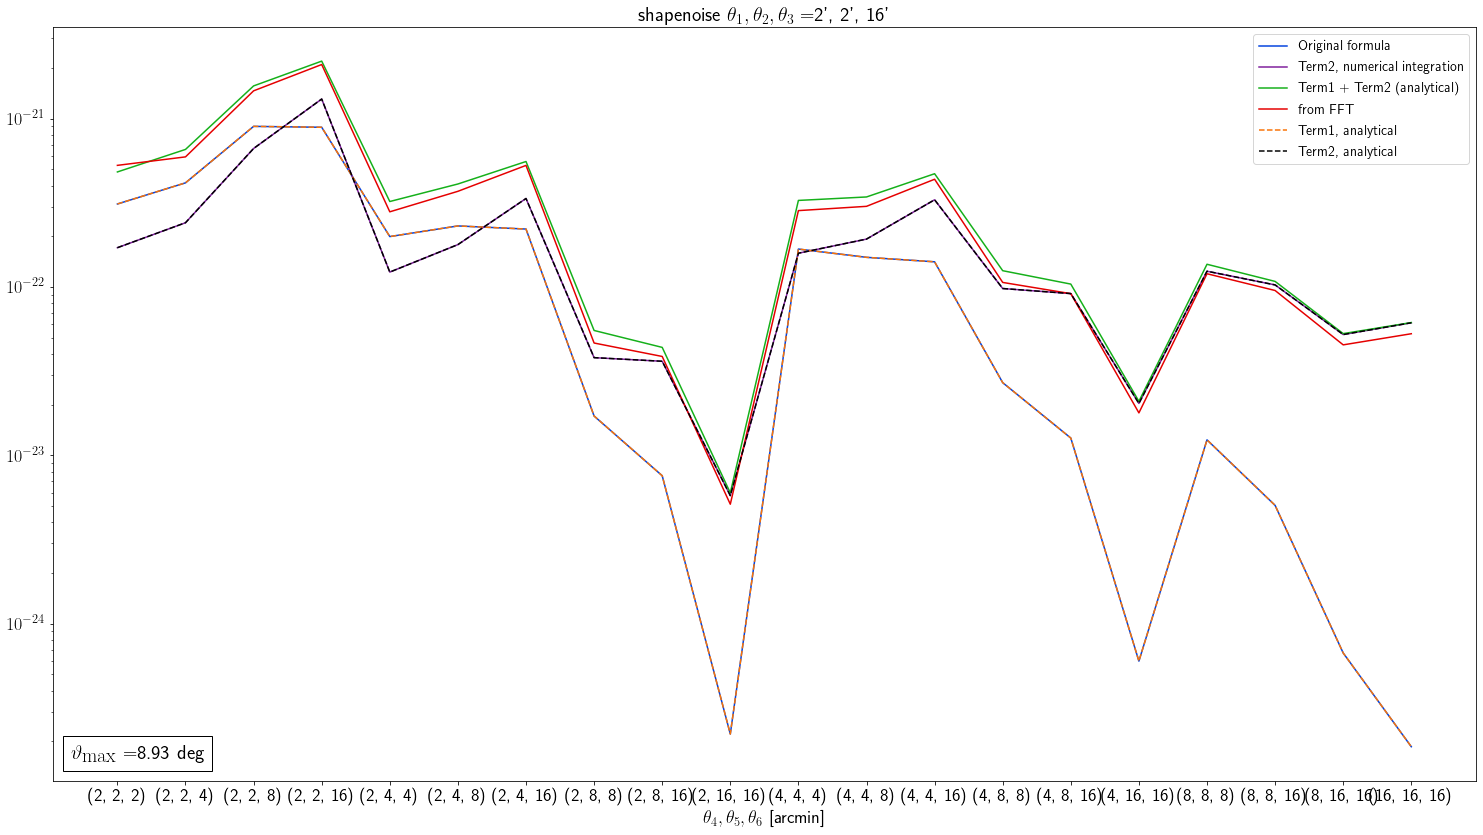

<Figure size 432x288 with 0 Axes>

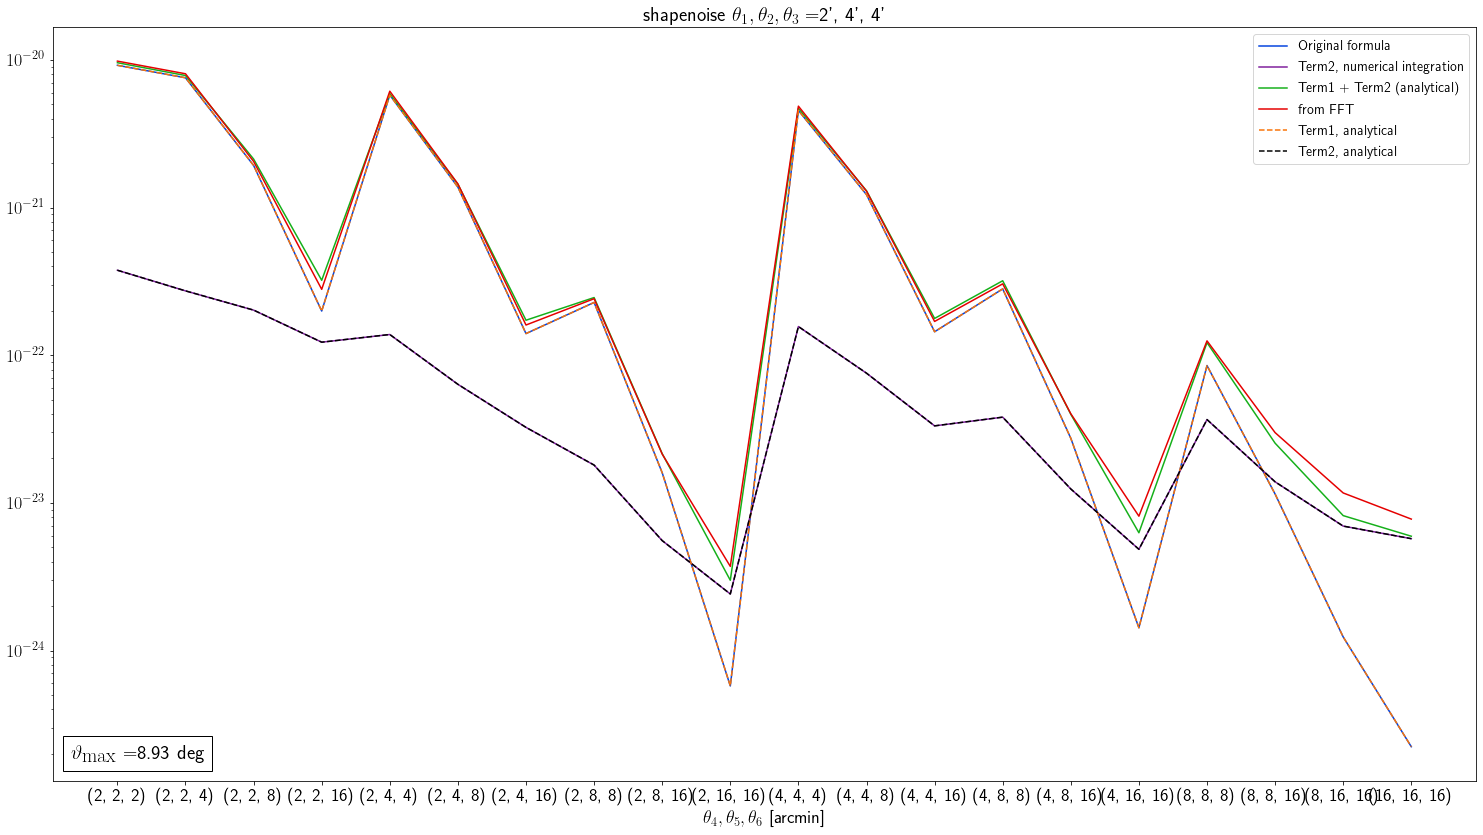

<Figure size 432x288 with 0 Axes>

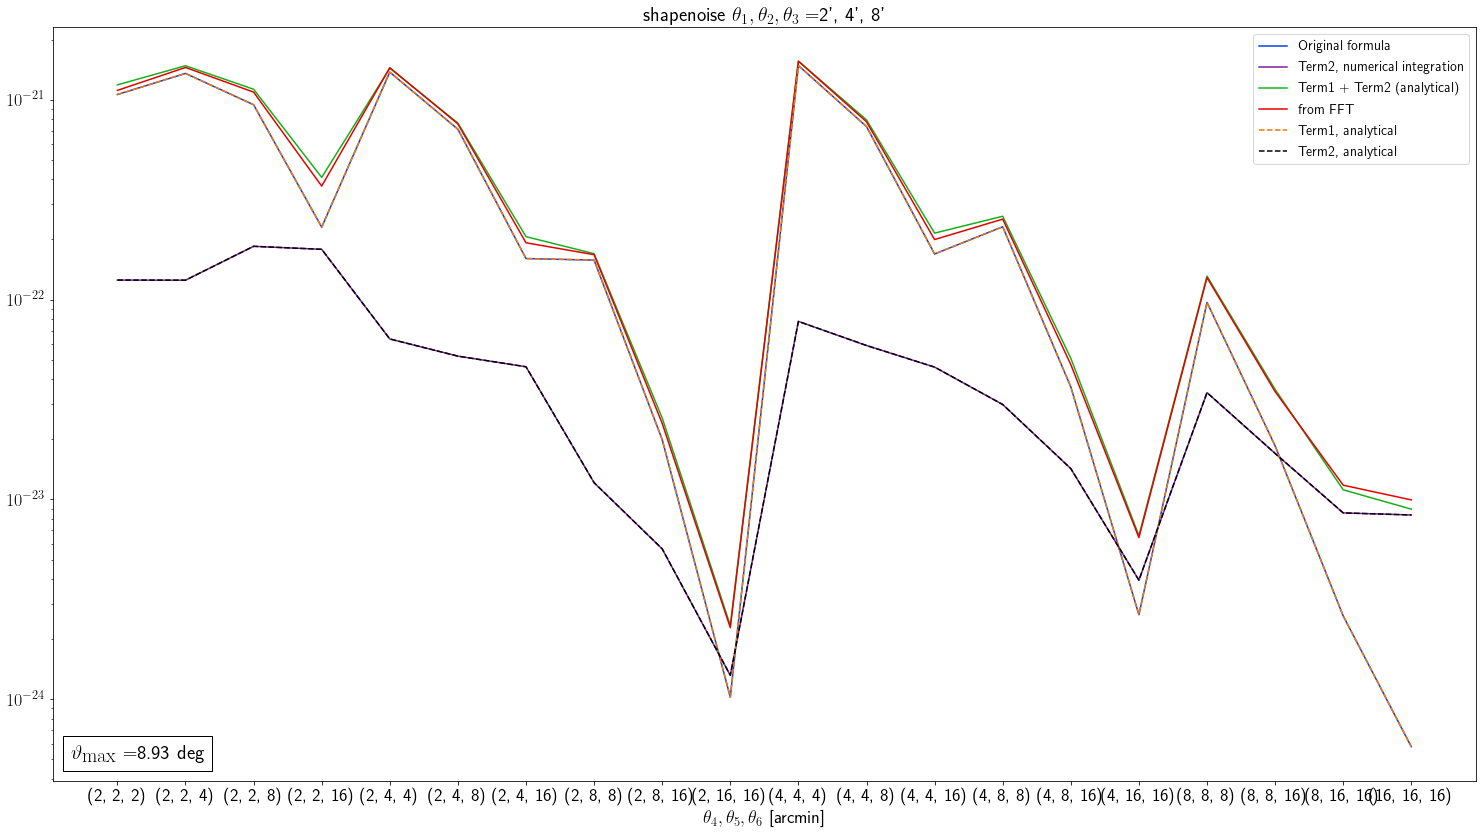

<Figure size 432x288 with 0 Axes>

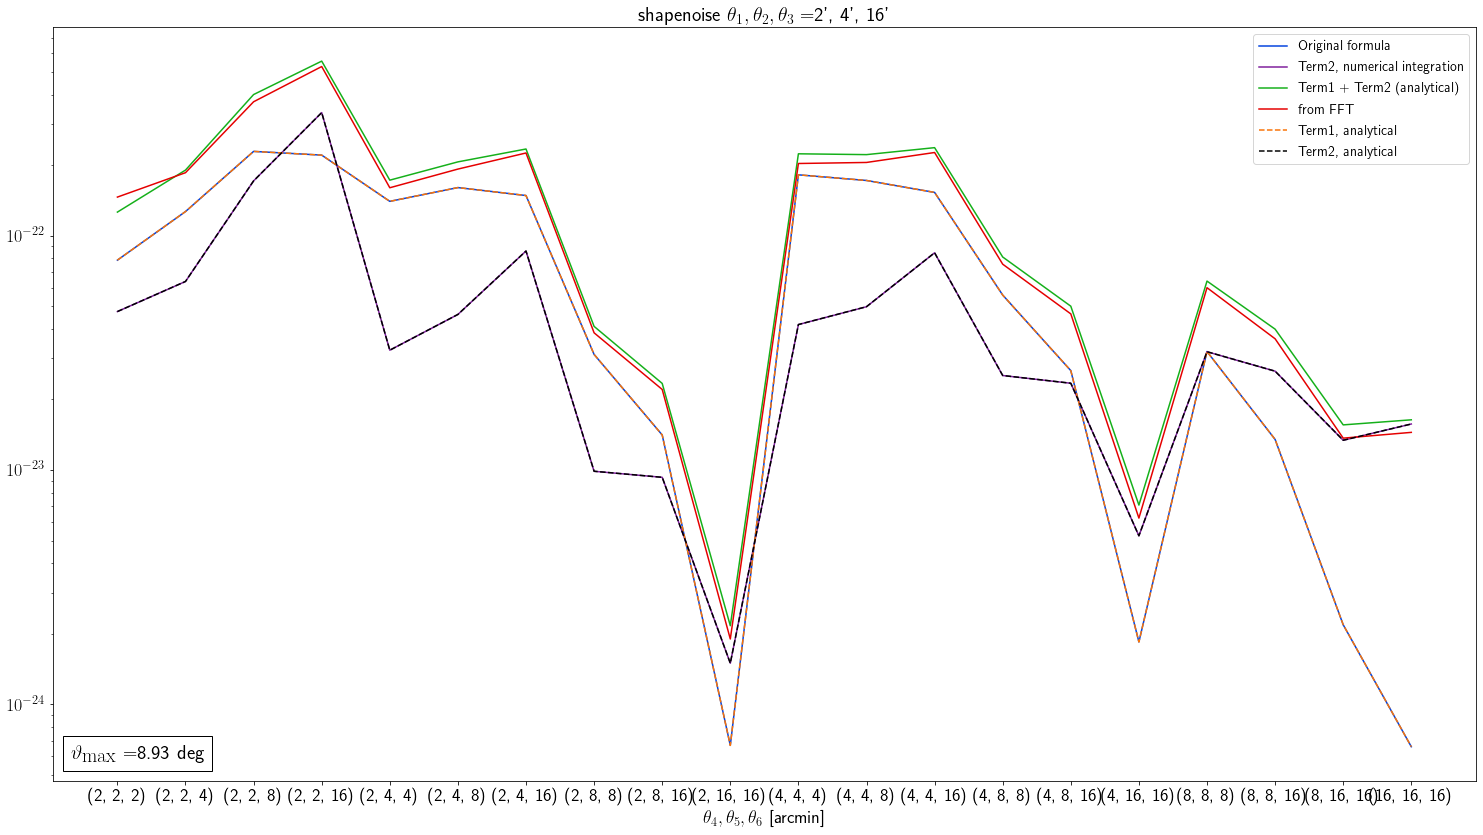

<Figure size 432x288 with 0 Axes>

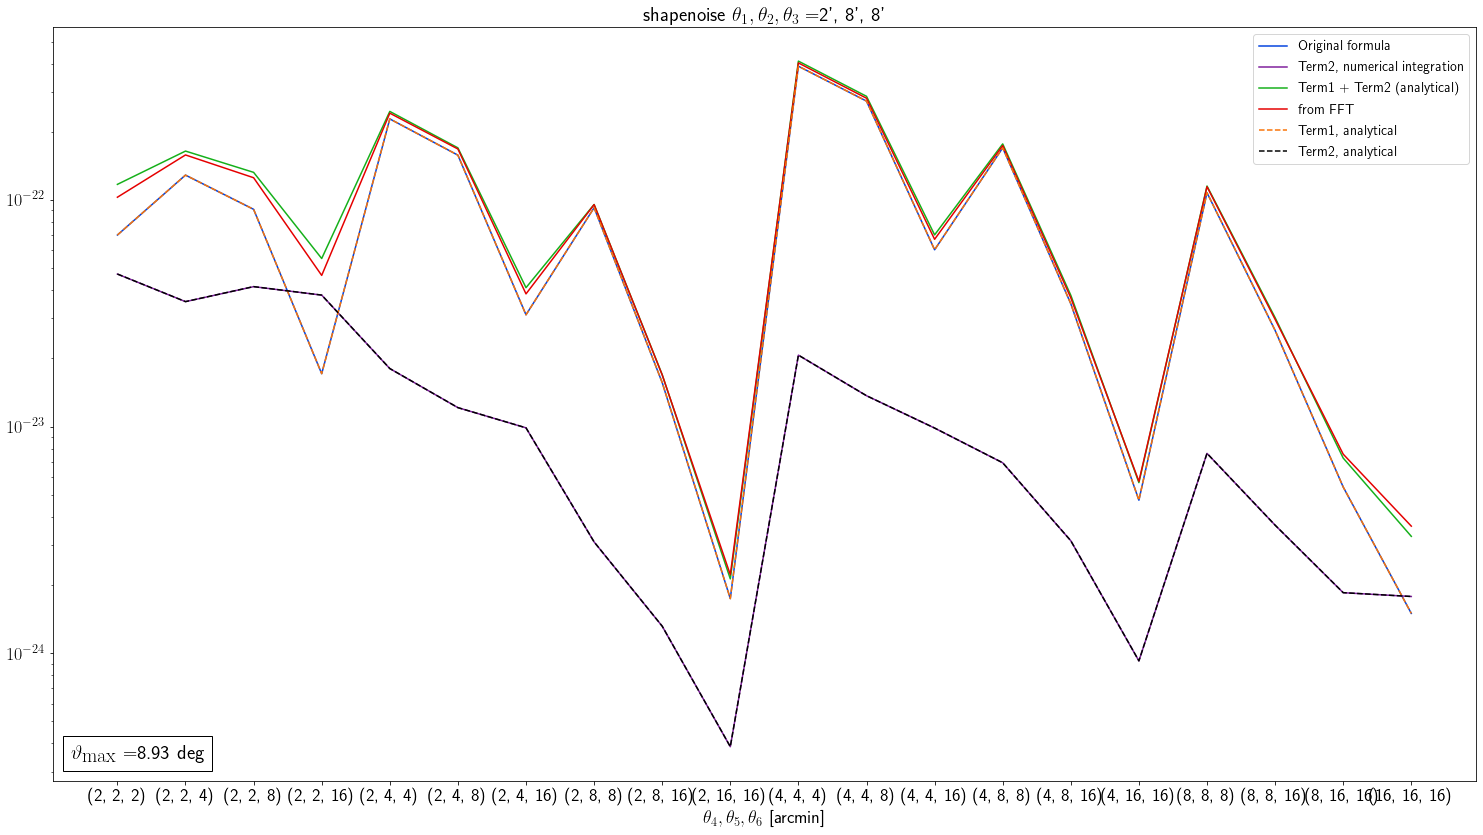

<Figure size 432x288 with 0 Axes>

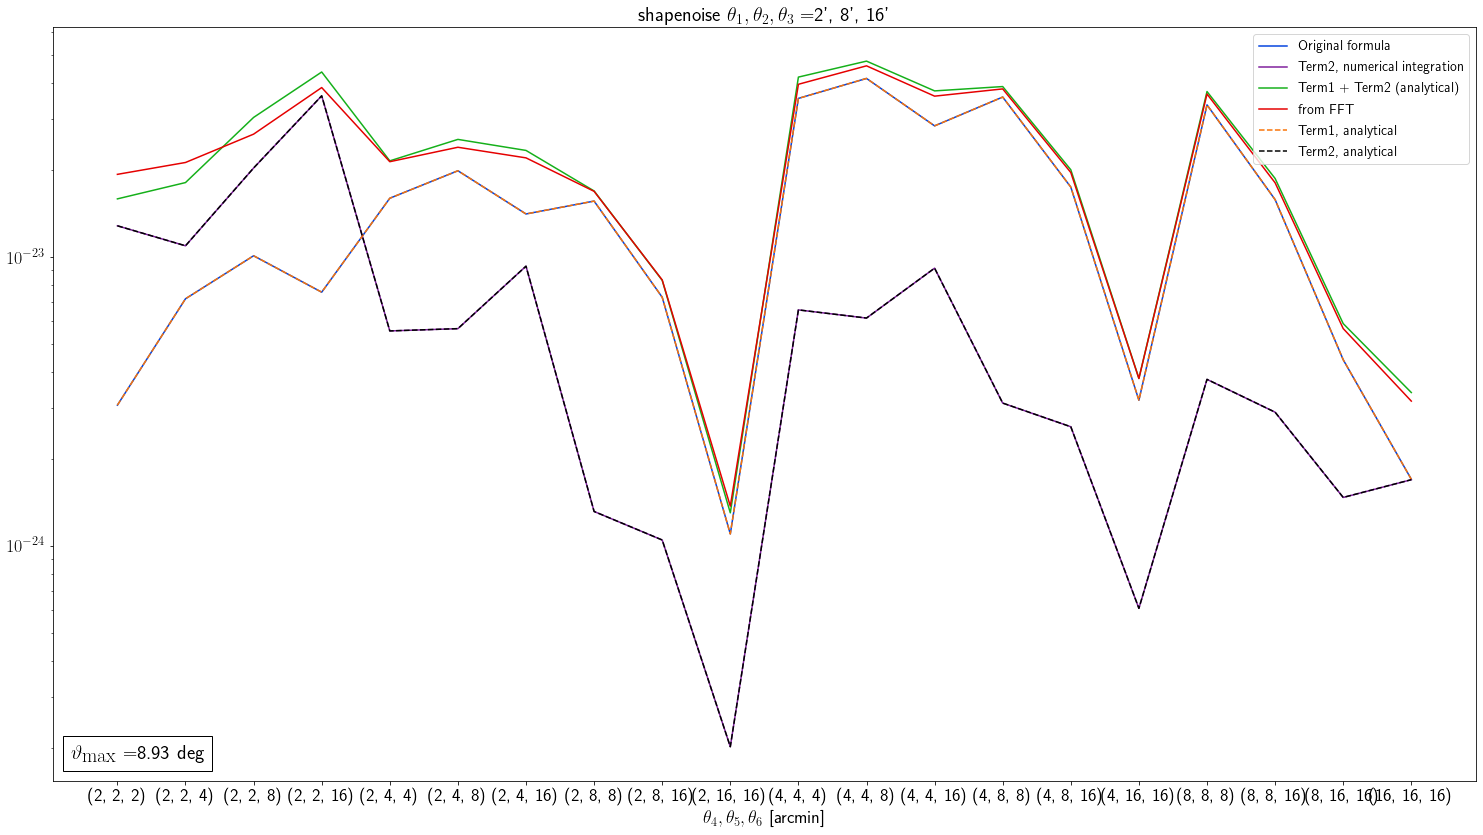

<Figure size 432x288 with 0 Axes>

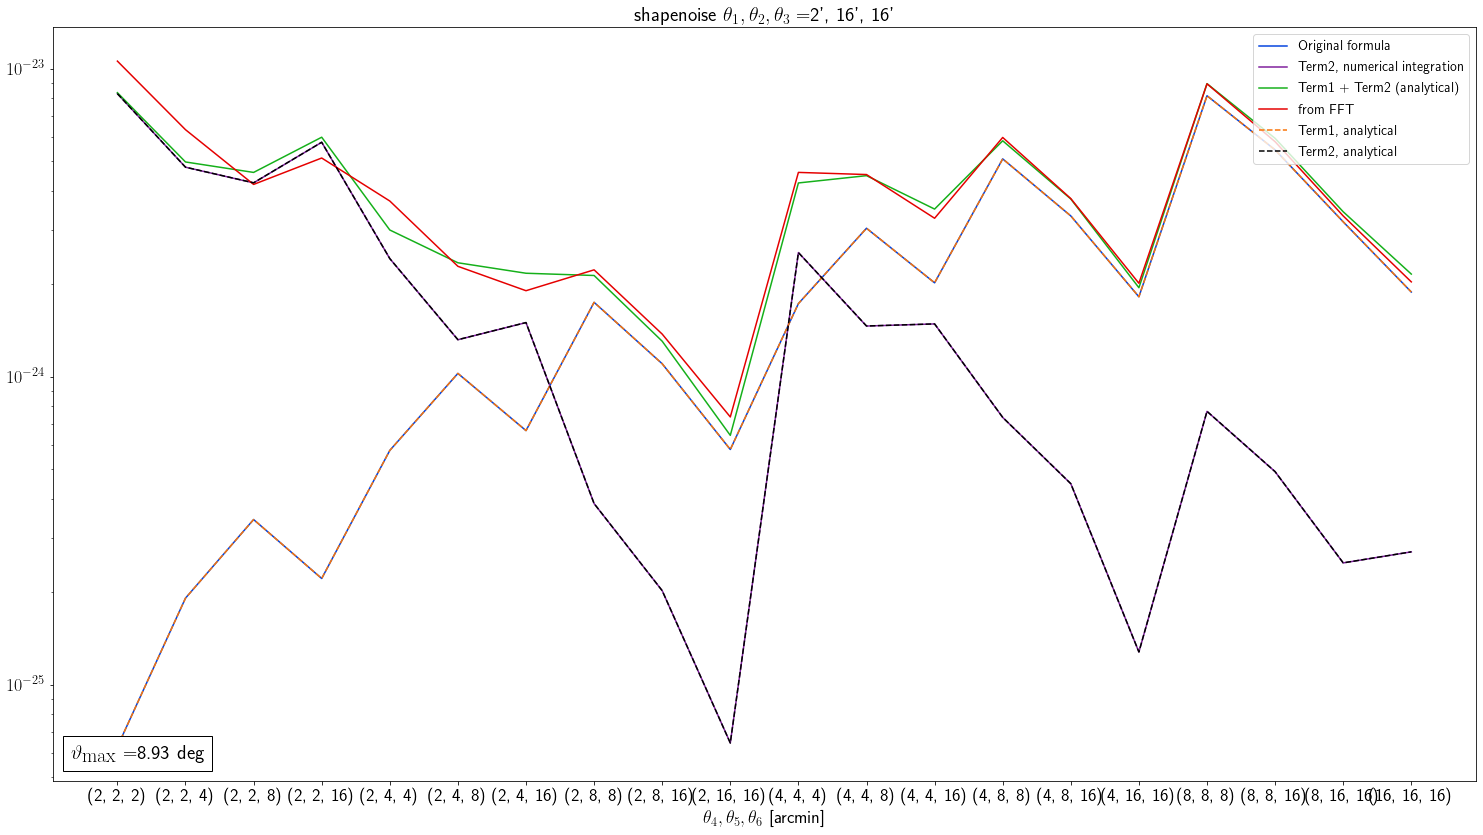

<Figure size 432x288 with 0 Axes>

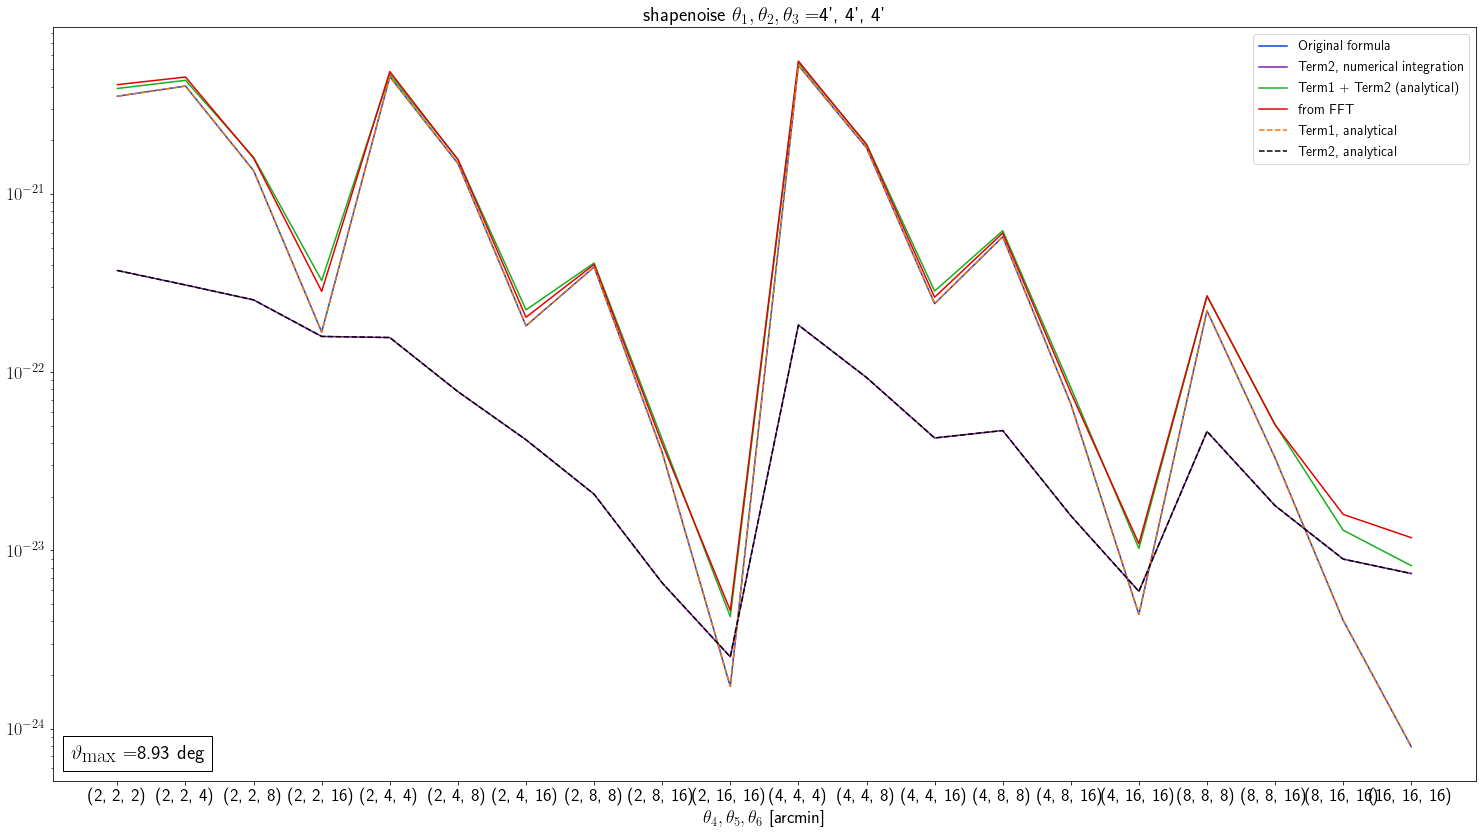

<Figure size 432x288 with 0 Axes>

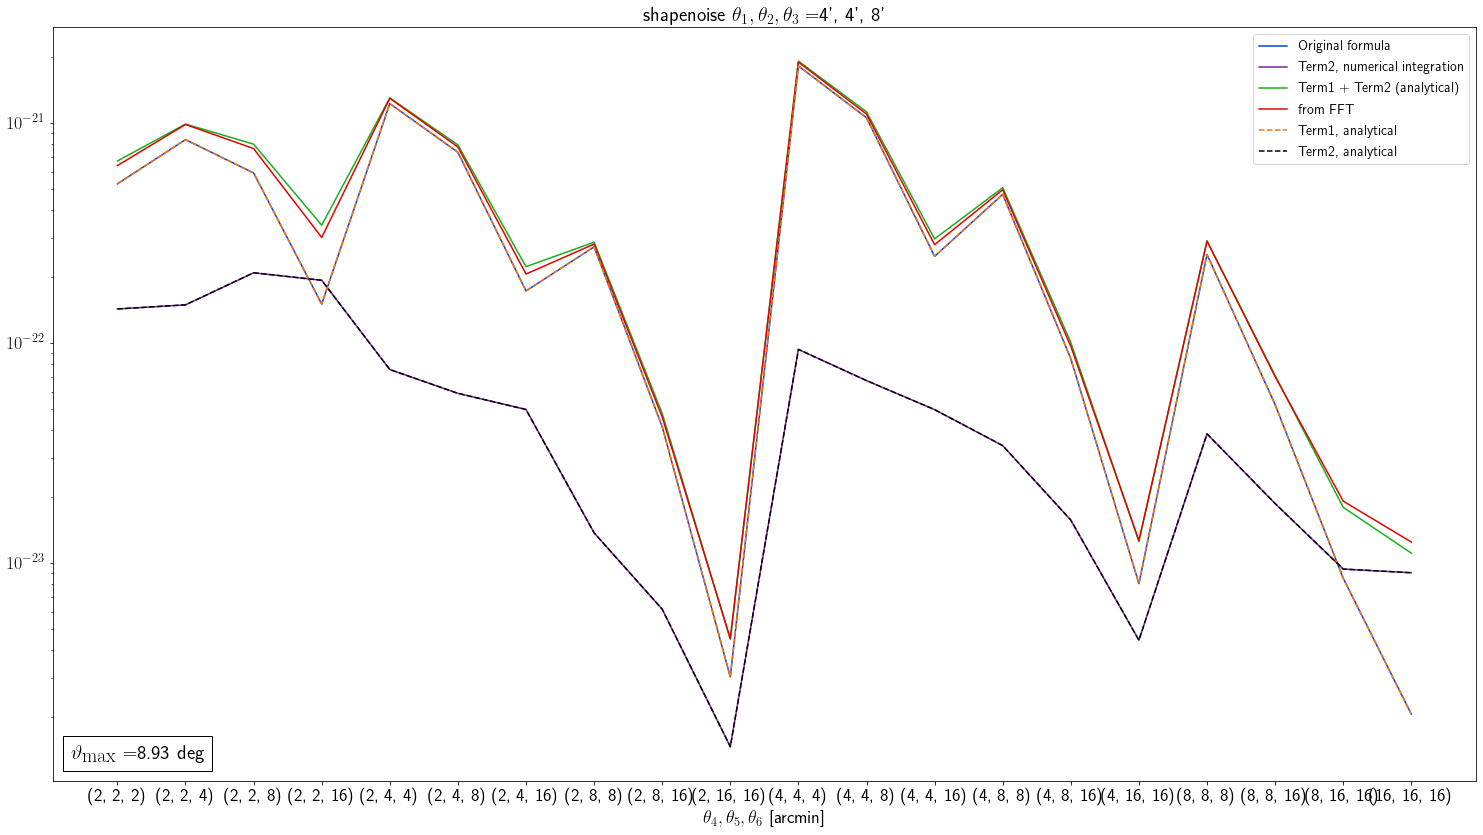

<Figure size 432x288 with 0 Axes>

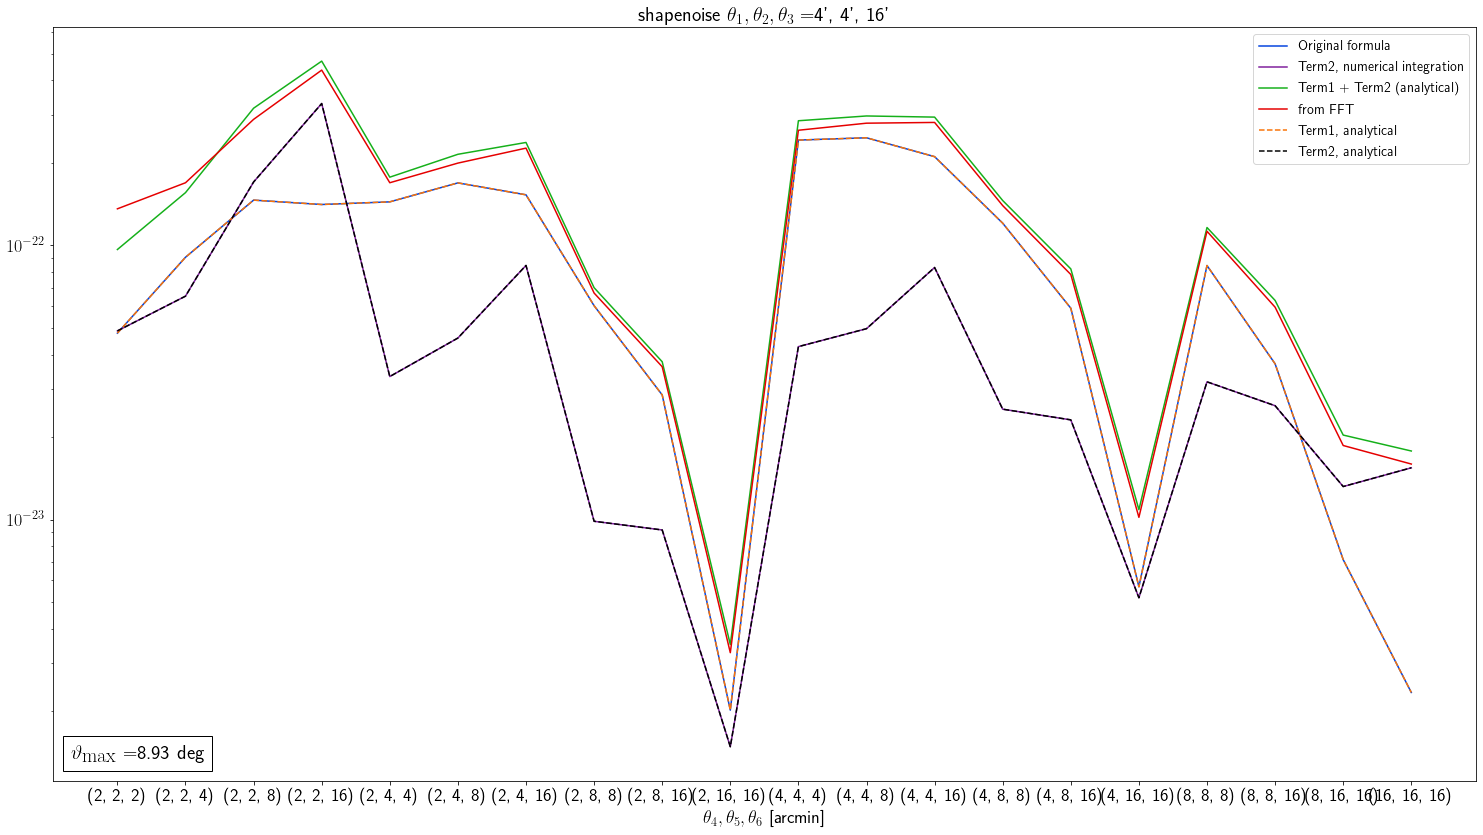

<Figure size 432x288 with 0 Axes>

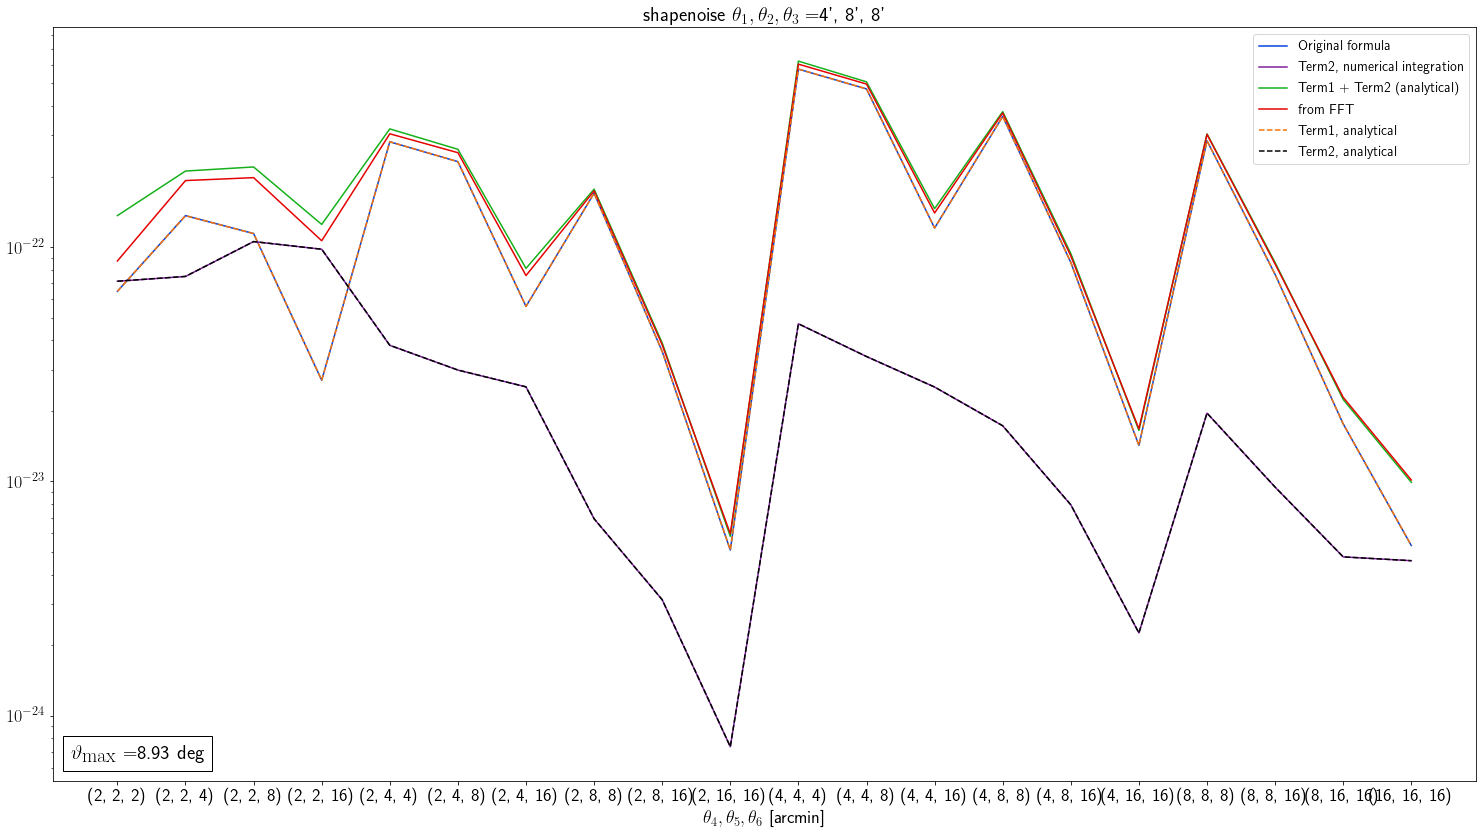

<Figure size 432x288 with 0 Axes>

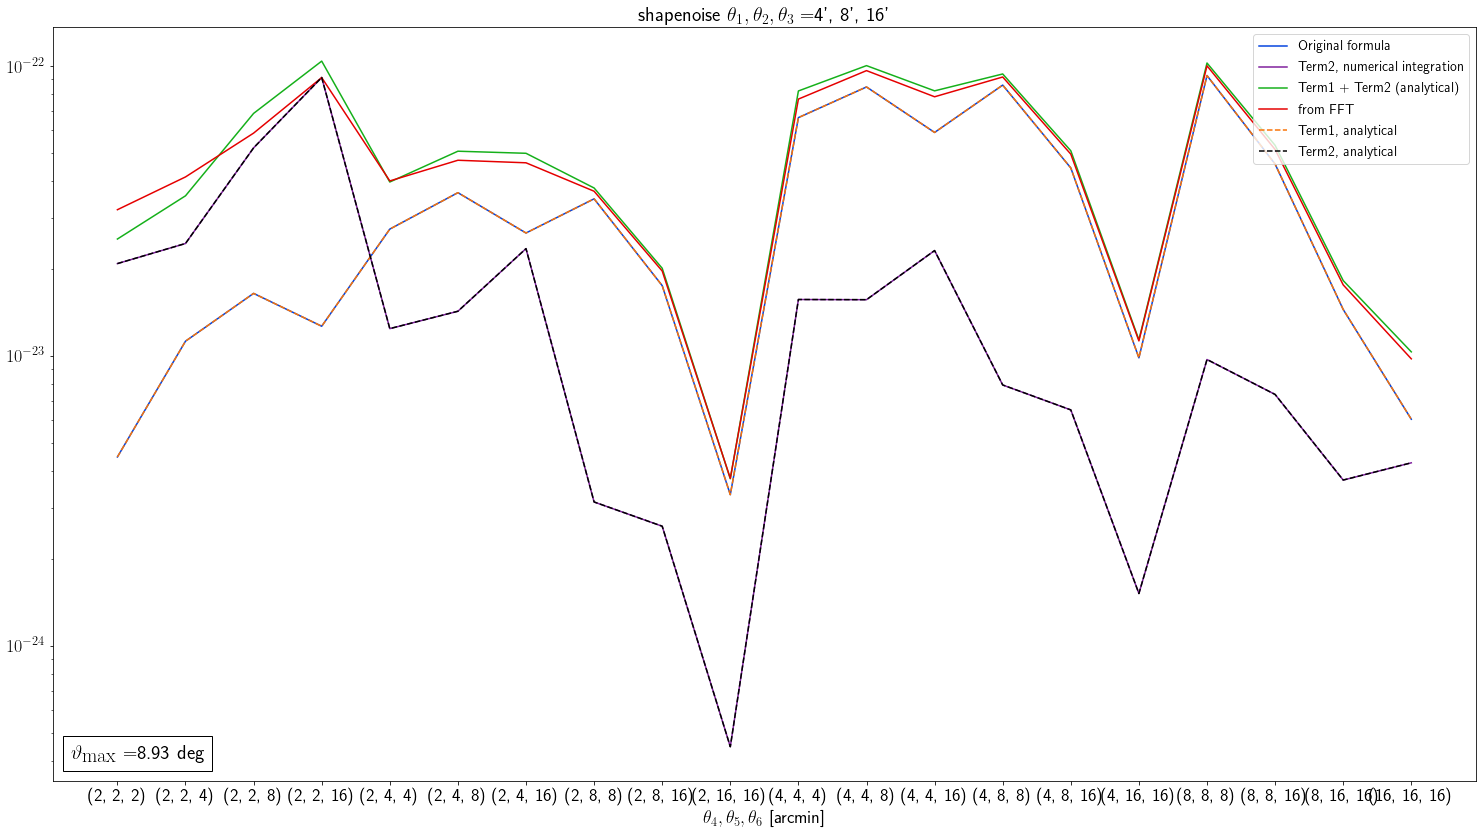

<Figure size 432x288 with 0 Axes>

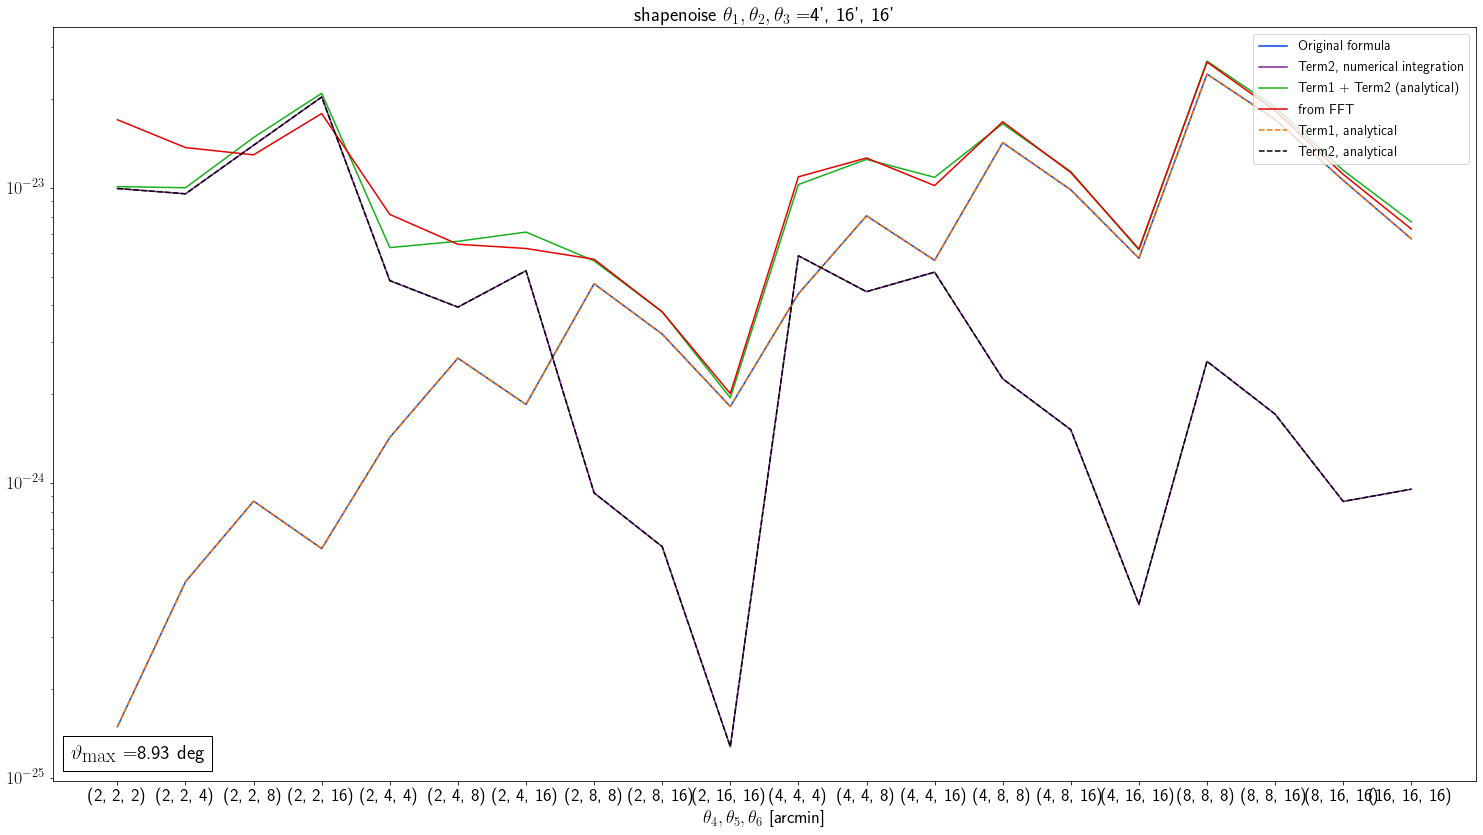

<Figure size 432x288 with 0 Axes>

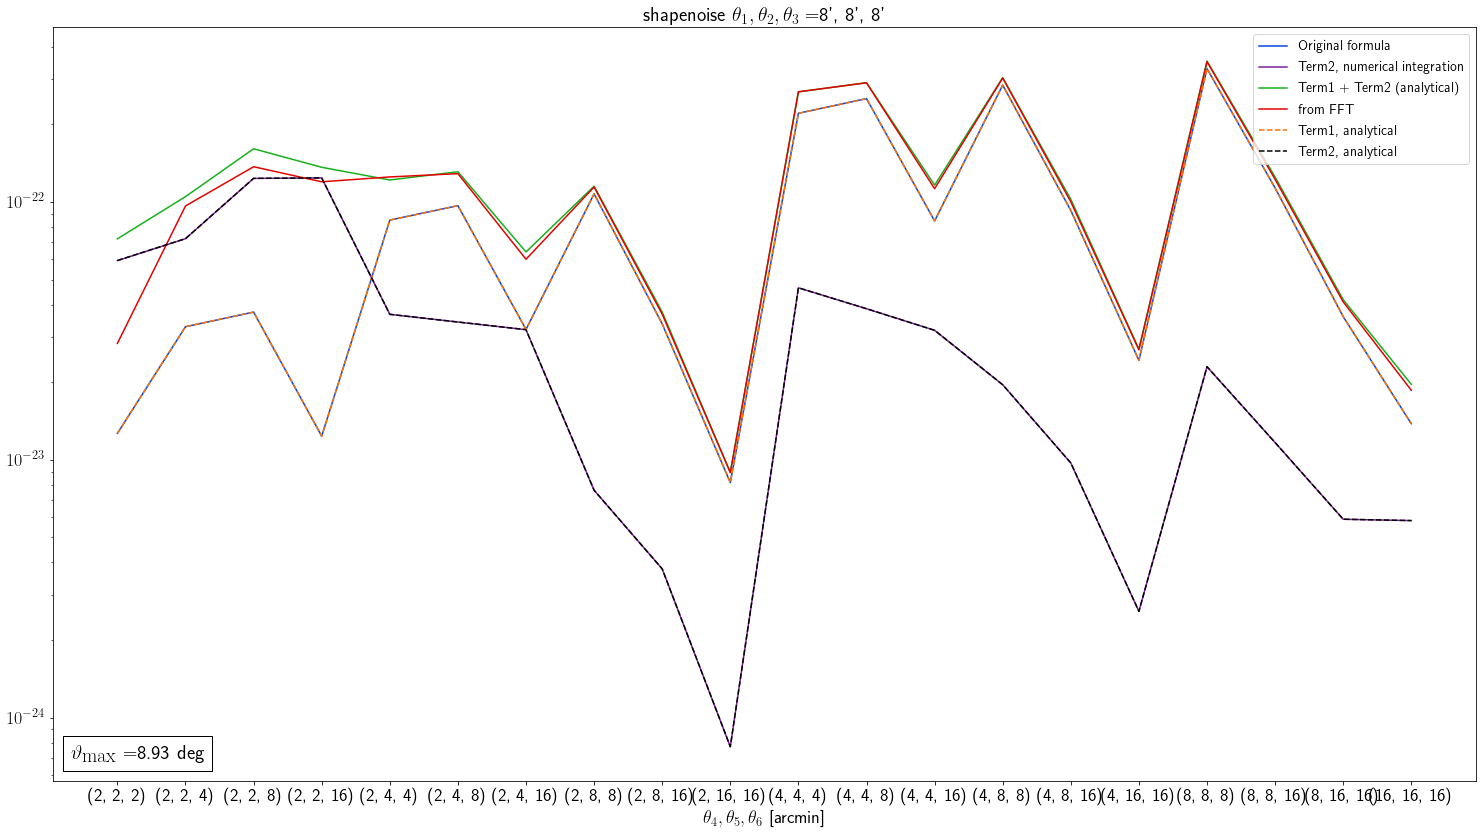

<Figure size 432x288 with 0 Axes>

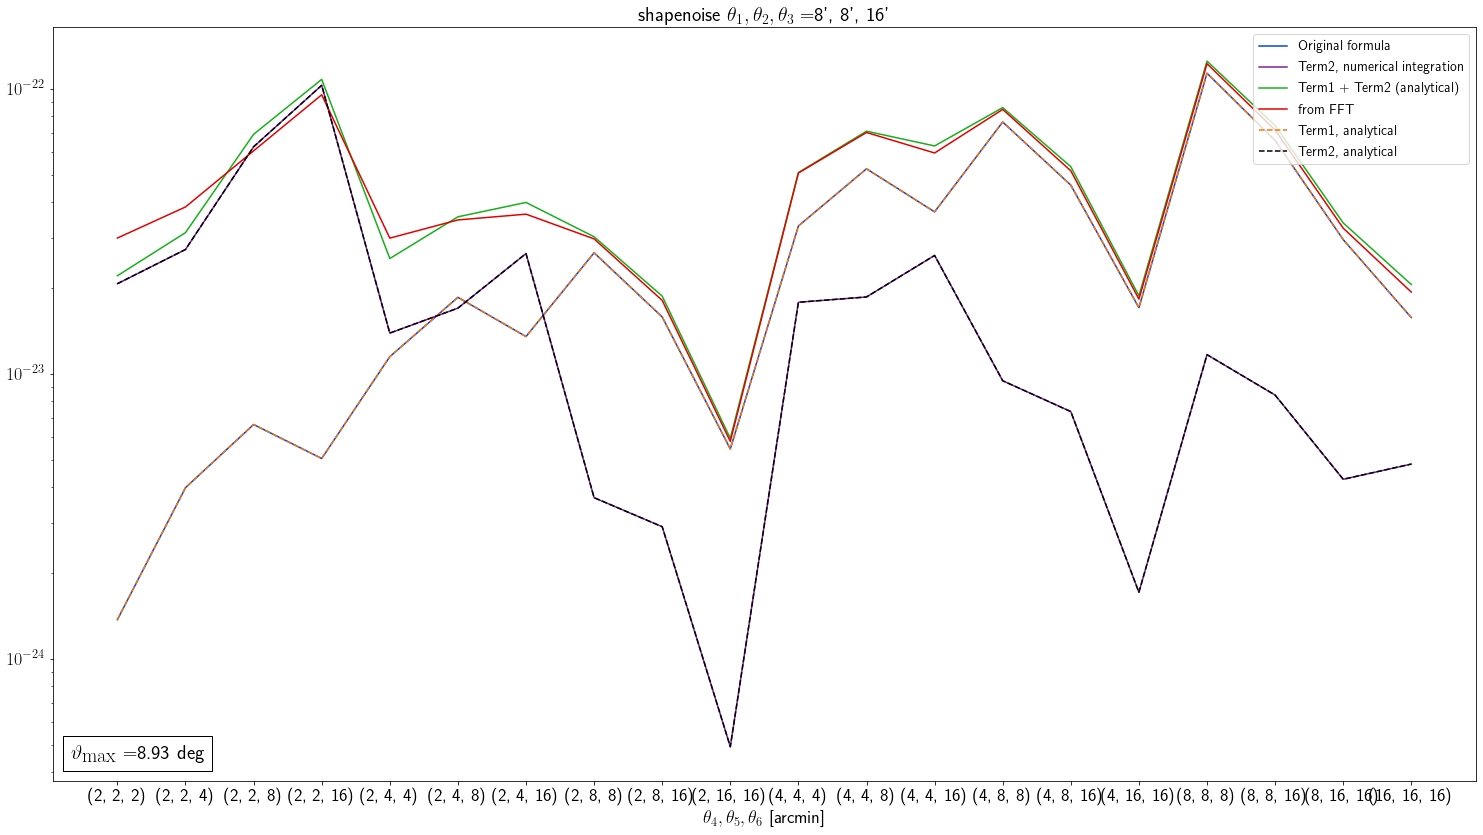

<Figure size 432x288 with 0 Axes>

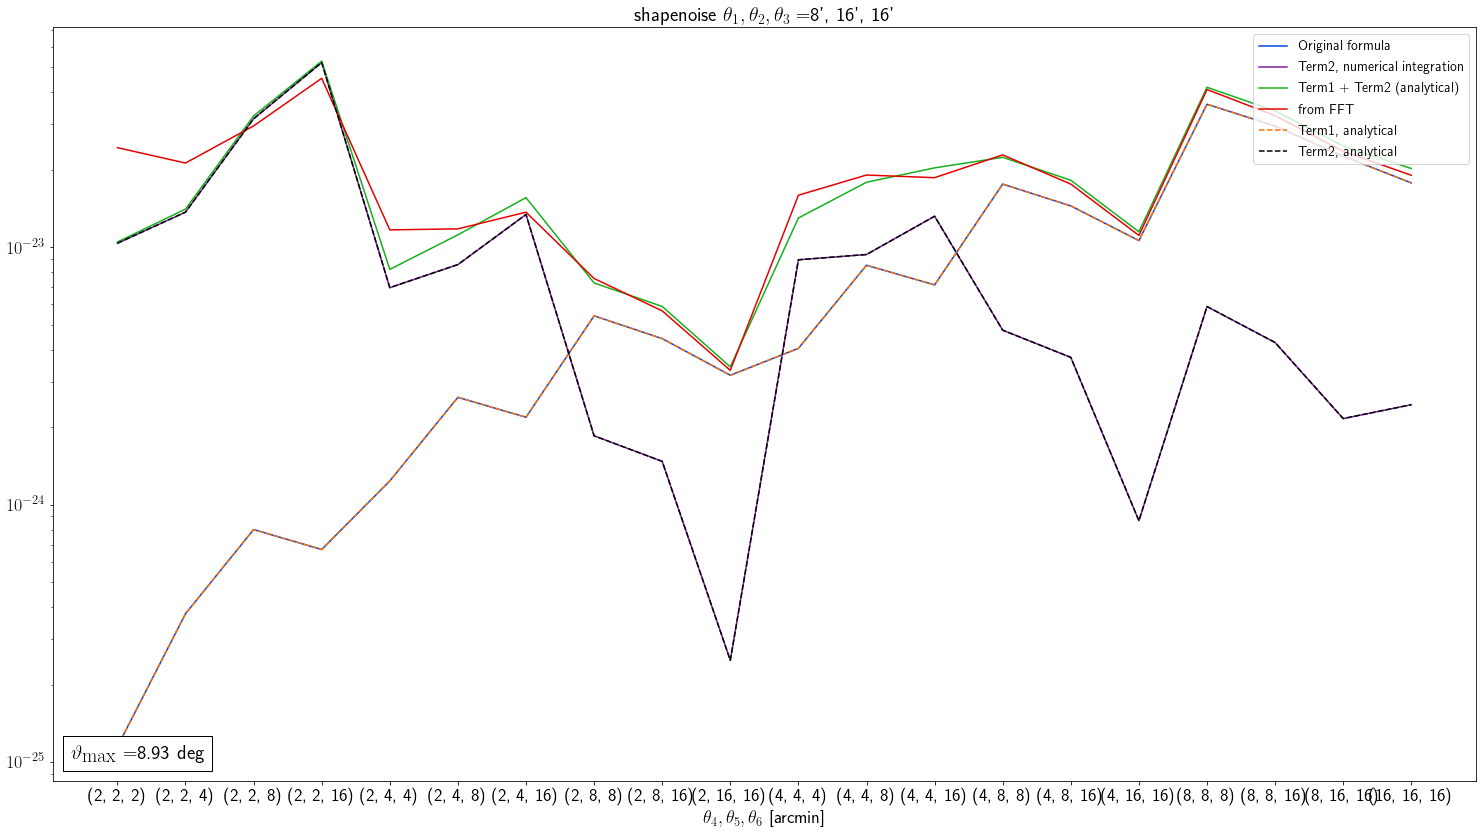

<Figure size 432x288 with 0 Axes>

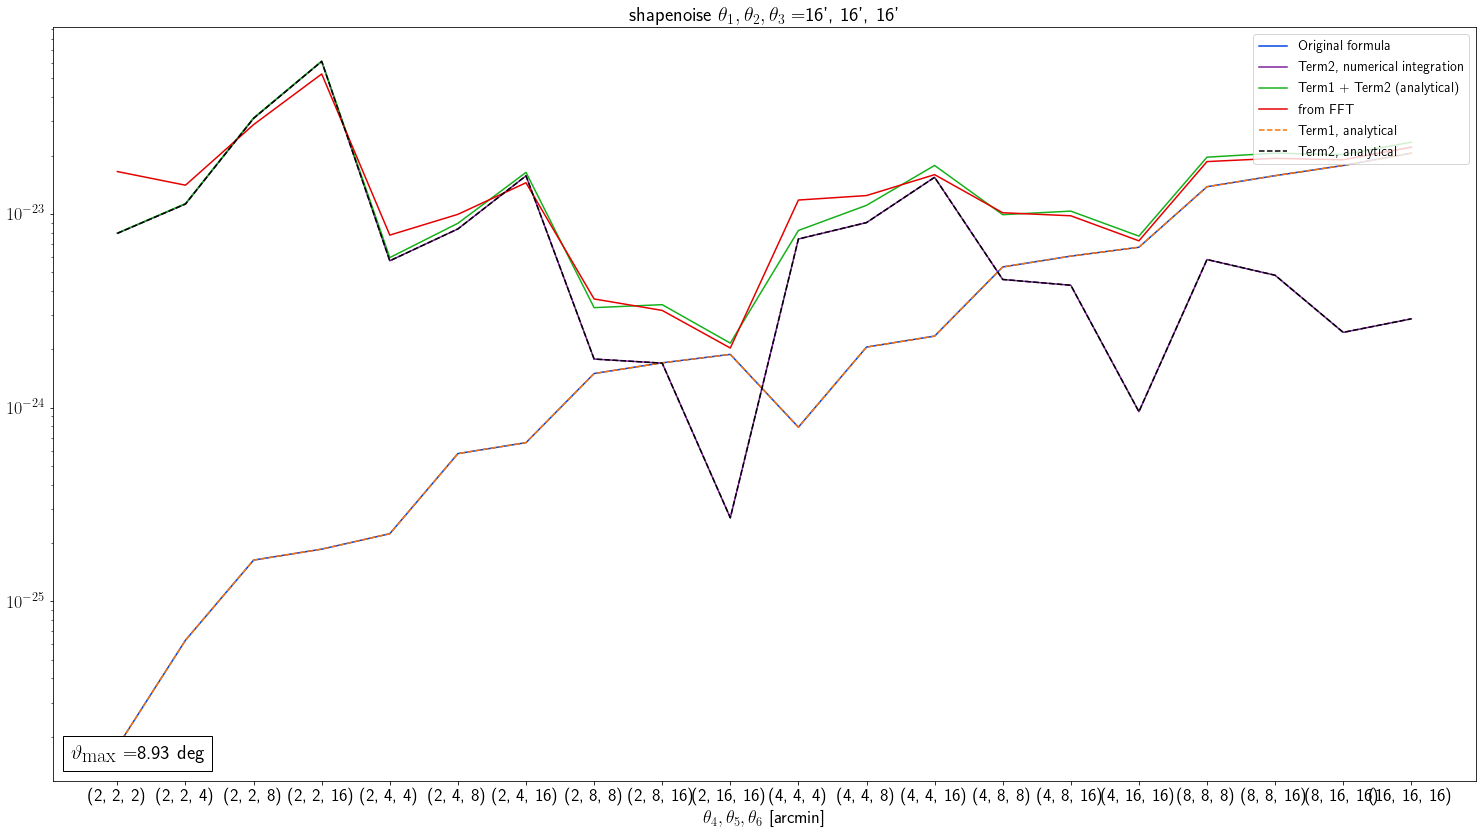

In [48]:
# Plot
thetas_ind=np.array([[2, 2, 2], [2, 2, 4], [2, 2, 8], [2, 2, 16],
                        [2, 4, 4], [2, 4, 8], [2, 4, 16], [2, 8, 8], 
                        [2, 8, 16], [2, 16, 16], [4, 4, 4], [4, 4, 8], 
                        [4, 4, 16], [4, 8, 8], [4, 8, 16], [4, 16, 16], 
                        [8, 8, 8], [8, 8, 16], [8, 16, 16], [16, 16, 16] ])
thetas_labels=[]
for thetas in thetas_ind:
    thetas_labels.append(f"({thetas[0]}, {thetas[1]}, {thetas[2]})")

N=len(thetas_ind)
thetas_ticks=np.arange(0, N)
for i, thetas1 in enumerate(thetas_ind):
    plt.clf()
    fig, ax=plt.subplots(figsize=(21,12))
    ax.set_yscale('log')
    ax.set_xlabel(r'$\theta_4, \theta_5, \theta_6$ [arcmin]')
    ax.set_xticks(thetas_ticks)
    ax.set_xticklabels(thetas_labels)

    if(cov_type=='slics'):
        ax.plot(cov_infiniteField[i], color='xkcd:blue', label='Original formula')
        ax.plot(cov_term2Numerical[i], color='xkcd:purple', label='Term2, numerical integration')

        ax.plot(cov_fft[i], color='xkcd:red', label='from FFT')
        ax.plot(cov_term2Numerical[i]+cov_infiniteField[i], color='xkcd:green', label='Term2 + original formula')
    elif (cov_type == 'shapenoise'):
        ax.plot(cov_infiniteField[i], color='xkcd:blue', label='Original formula')
        ax.plot(cov_term2Numerical[i], color='xkcd:purple', label='Term2, numerical integration')

        ax.plot(cov_term2Analytical[i]+cov_infiniteField[i], color='xkcd:green', label='Term1 + Term2 (analytical)')
        ax.plot(cov_fft[i], color='xkcd:red', label='from FFT')
        ax.plot(cov_term1Analytical[i], color='xkcd:orange', label='Term1, analytical', ls='--')
        ax.plot(cov_term2Analytical[i], color='xkcd:black', label='Term2, analytical', ls='--')
    else:
        print('Cov type not specified')
    at=AnchoredText(r"$\vartheta_\textrm{max}=$"+f"{thetaMax:.2f} deg", loc='lower left')
    ax.add_artist(at)
    
    finalizePlot(ax, title=cov_type+r' $\theta_1, \theta_2, \theta_3=$'+f"{thetas1[0]}', {thetas1[1]}', {thetas1[2]}'", outputFn=folder+f"cov_{thetas1[0]}_{thetas1[1]}_{thetas1[2]}.png", loc_legend='upper right')